# Exploring the TMDB movie dataset 
## 1.0 Introduction
The current data set consist of various movies and related information about these movies. This information involves financial budget, revenue, original title, cast, vote average, etc for different movies. A total of ~5000 movies are included in this data set. Approximately 28 different type of attributes related to these movies are included in the data set. A more comprehnensive list can be found by runnning the code below. 
In the current report, impact of variables like release year, budget of the movie, etc on imdb_rating has been investigated. In the report initially data is analyzed for missing values and completeness. Then based on the data different questions are framed to derive useful information. These are explained further in the subsequent sections

## 2.0 Data Cleaning

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
#os.chdir("C:\Users\goyala")
os.getcwd()
df=pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


A quick glance at the data shows that their are missing values in various columns such as aspect_ratio,title_year,budget,content_rating,genres, etc. Thus it is crucial to take into account the NAN values when analyzing the data. The data has total of 28 columns which includes various fields such as popularity, id,imdb_id, budget, etc.
Following columns have NAN values:
We can drop the columns that we will not be using in our analysis. In this analysis we will be focussing mainly on the popularity of a movie and factors governing it. We can drop columns like 'aspect_ratio','movie_imdb_link', 'content_rating', etc and  can get a new data set. The code below eliminates the unnecessary columns out of our dataset.

In [7]:
df.drop(['aspect_ratio','movie_imdb_link','content_rating','plot_keywords'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 24 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
language                     5031 non

The new dataset has missing values in gross,actor_3_name,num_user_for reviews,etc. We will drop the rows containing the null values. It is possible not same rows have NAN values and hence we will be loosing data.

In [8]:
df.dropna(axis=0,how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869 entries, 0 to 5042
Data columns (total 24 columns):
color                        3869 non-null object
director_name                3869 non-null object
num_critic_for_reviews       3869 non-null float64
duration                     3869 non-null float64
director_facebook_likes      3869 non-null float64
actor_3_facebook_likes       3869 non-null float64
actor_2_name                 3869 non-null object
actor_1_facebook_likes       3869 non-null float64
gross                        3869 non-null float64
genres                       3869 non-null object
actor_1_name                 3869 non-null object
movie_title                  3869 non-null object
num_voted_users              3869 non-null int64
cast_total_facebook_likes    3869 non-null int64
actor_3_name                 3869 non-null object
facenumber_in_poster         3869 non-null float64
num_user_for_reviews         3869 non-null float64
language                     3869 non

## 3.0 Exploratory Analysis

Based on the information above following questions can be asked:
1) Does higher budget movies have higher imdb rating?
4) Do release year and average imdb ratings related?
5) How does release year impact the imdb rating of low budget and high budget movies
8) Does Facenumber in poster has better IMDB rating?

### 3.1 Budget
We will dig deeper in the data set and answer questions one by one. To answer first question: If higher budget movies have higher imdb rating we will first create a dataset containing movies name column, vote_average and budget. 

In [9]:
df_budget=df[['movie_title','budget','imdb_score']]

We will now explore this data set for null values, duplicate values, etc and clean as necessary

In [10]:
df_budget=df[['movie_title','imdb_score','budget']]
#print(df_budget.duplicated().value_counts())
df_budget=df_budget.drop_duplicates()
print(df_budget.duplicated().value_counts())

False    3768
dtype: int64


We will now try to understand relation between budget of the movie and vote_average

(0, 400000000.0)

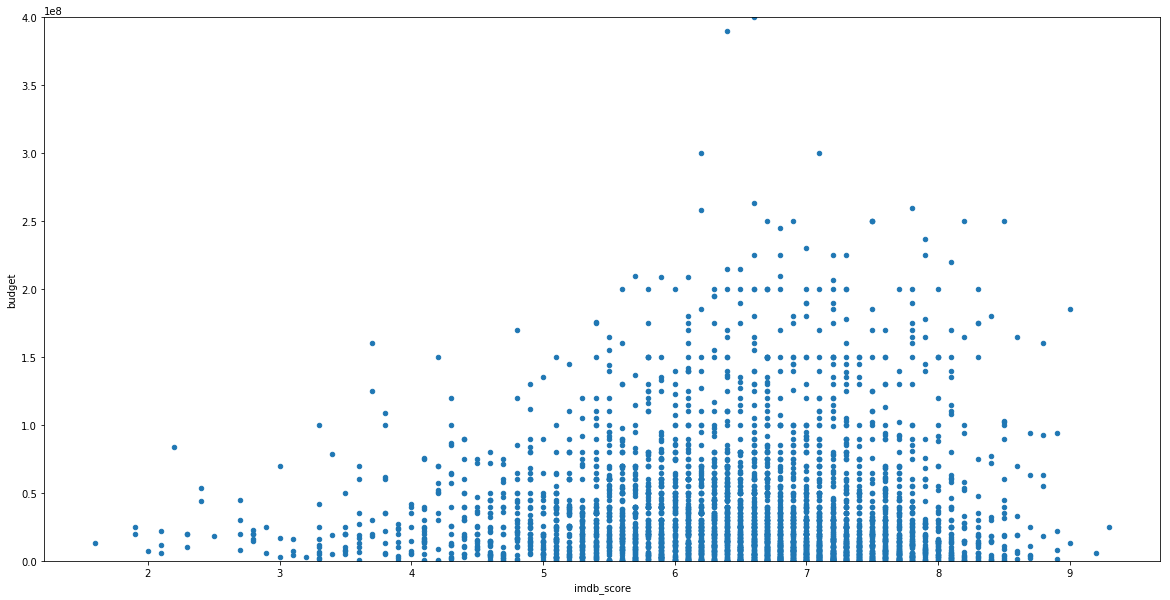

In [11]:
ax=df_budget.plot(y='budget',x='imdb_score',kind='scatter',figsize=(20,10))
ax.set_ylim([0,0.4e9])

Upon careful observation of the above scatter plot, we can notice that movies with lower budget can have any ratings between 1 and 9. However when budget of the movie increases the rating tends to be higher, for instance movies with budget >2e8 has ratings >6. This will be expected since a higher budget movie have better sets, high quality artists, better effects, etc. 

We wil not further look into low budget movies and see what factors influences the vote average. We will define low budget movies as movies whose budget is less than or equal to 0.1e8

In [12]:
df_low_budget=df[df['budget']<=200000000]
df_high_budget=df[df['budget']>200000000]
#subsets the low budget movies

We will see if certain directors have perform well even though the budget is low for their movie. We will group the data by directors and calculate the mean of their vote_average. Before analyzing data we will first create a function 'plotipy' that will take inputs from the user and create bar charts.

In [13]:
def plotipy(data,label,k,p,sz):
    str(label)
    str(k)
    ax=data.plot(kind=k,figsize=sz)
    ax.set_ylabel(label)
    ax.set_ylim(p)
    return ax
#p is the input for y limits
#k is input for kind of plot
#label is input for the y axis
#labelx is input for x axis

### 3.2 Release Year
Does Release year impact the vote average?

In [14]:
df_year=df[['imdb_score','title_year']]
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869 entries, 0 to 5042
Data columns (total 2 columns):
imdb_score    3869 non-null float64
title_year    3869 non-null float64
dtypes: float64(2)
memory usage: 90.7 KB


The above data set does not include any null values and hence we can proceed to investigate it further

In [15]:
df_year=df_year.groupby('title_year').mean()['imdb_score']
#groups the data set based on release year and calculates average rating for each movies released in that particular year

We will first group the ratings by release year and then analyze the trend

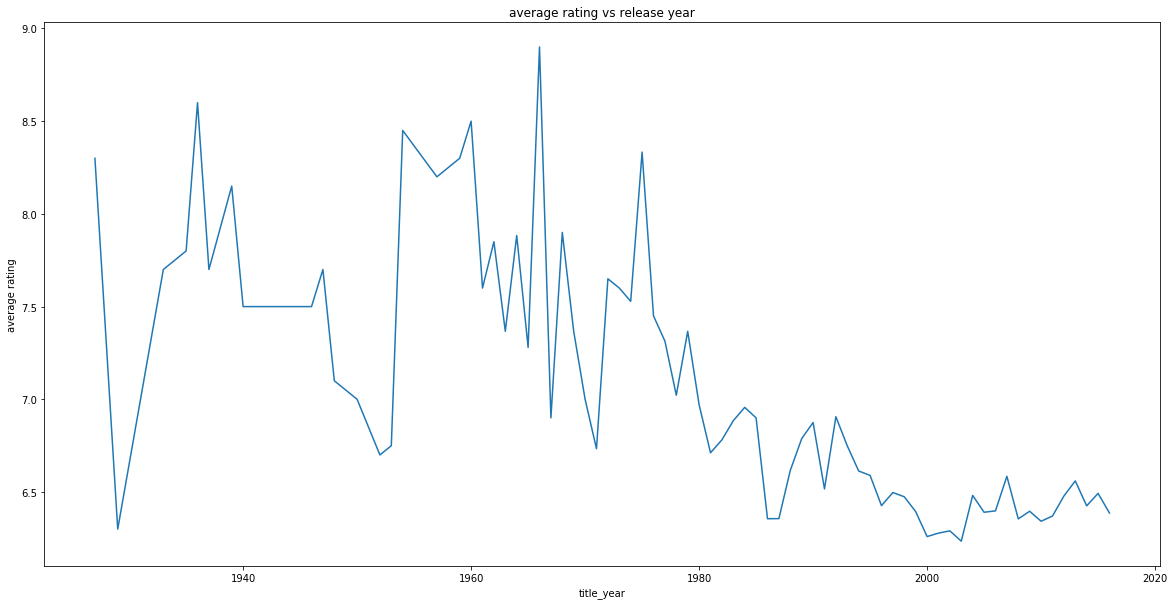

In [16]:
ac=df_year.plot(figsize=(20,10))
ac.set_ylabel('average rating')
ac.set_title('average rating vs release year');

The graph above shows trend of average reating over the years. The overall average ratings for each year shows a declining trend. We will further analyze the trend for low budget movies and high budget movies.

In [17]:
df_year_low_budget=df_low_budget[['imdb_score','title_year']]

In [18]:
df_year_low_budget=df_year_low_budget.groupby('title_year').mean()['imdb_score']
#groups and calculates average rating for low budget dataset

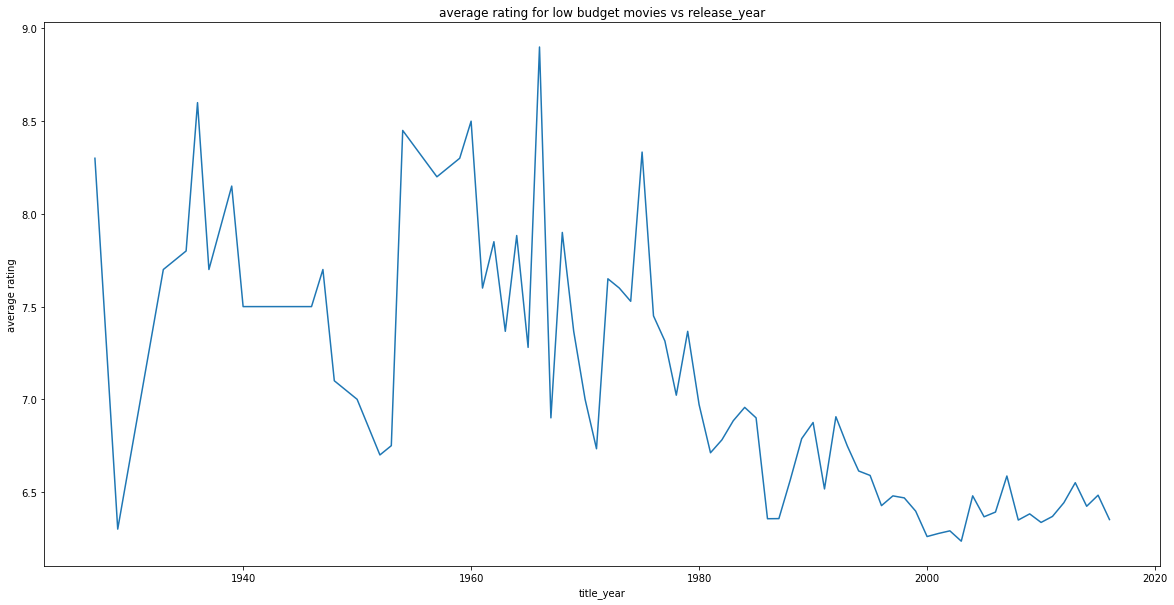

In [19]:
ad=df_year_low_budget.plot(figsize=(20,10))
ad.set_ylabel('average rating')
ad.set_title('average rating for low budget movies vs release_year');

The graph above shows average rating of low budget movies vs release year.The above trends show overall declining trends over the year. People started to loose interest in the movies over the years. The movies plotted above include both high budget and low budget movies. Lets further look into range of budget for these movies over the years. Lets look into what is the maximum and minimum budget for each year. We will re-create data frame with just release_year and budget.

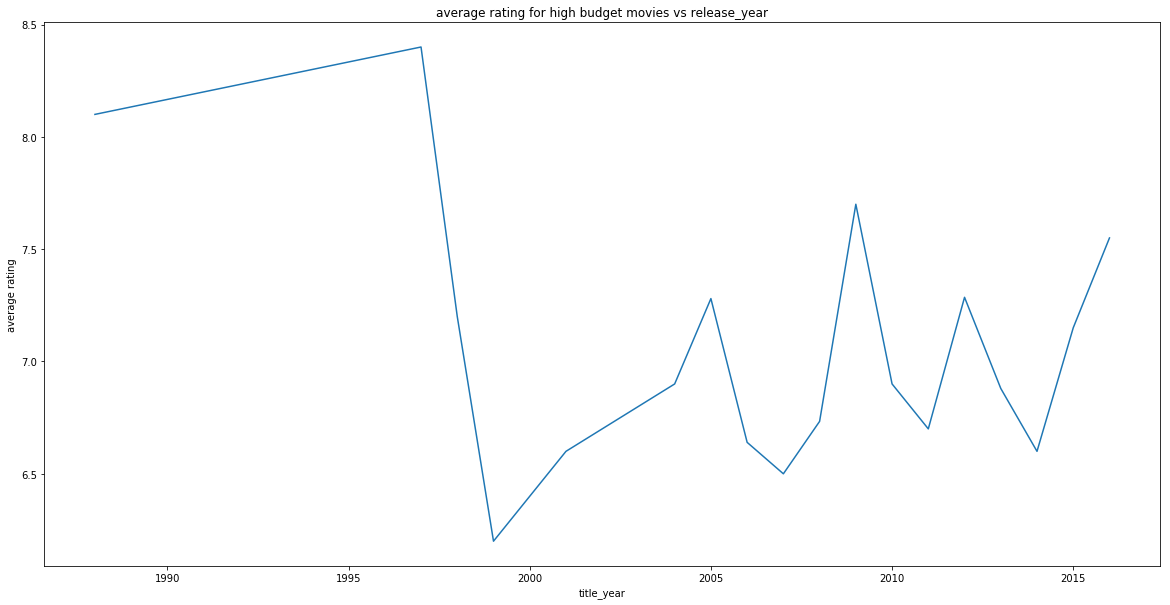

In [20]:
df_year_high_budget=df_high_budget[['imdb_score','title_year']]
df_year_high_budget=df_year_high_budget.groupby('title_year').mean()['imdb_score']
ax=df_year_high_budget.plot(figsize=(20,10))
ax.set_ylabel('average rating')
ax.set_title('average rating for high budget movies vs release_year');

The graph shows that average rating of high budget movies are relatively higher.

### 3.3 Size of Star Cast

Below we will analyze if number of characters on posters is increasing with year of release. Typically the main star cast is on the poster. Thus number of faces on poster can suggest us the size of star cast. 

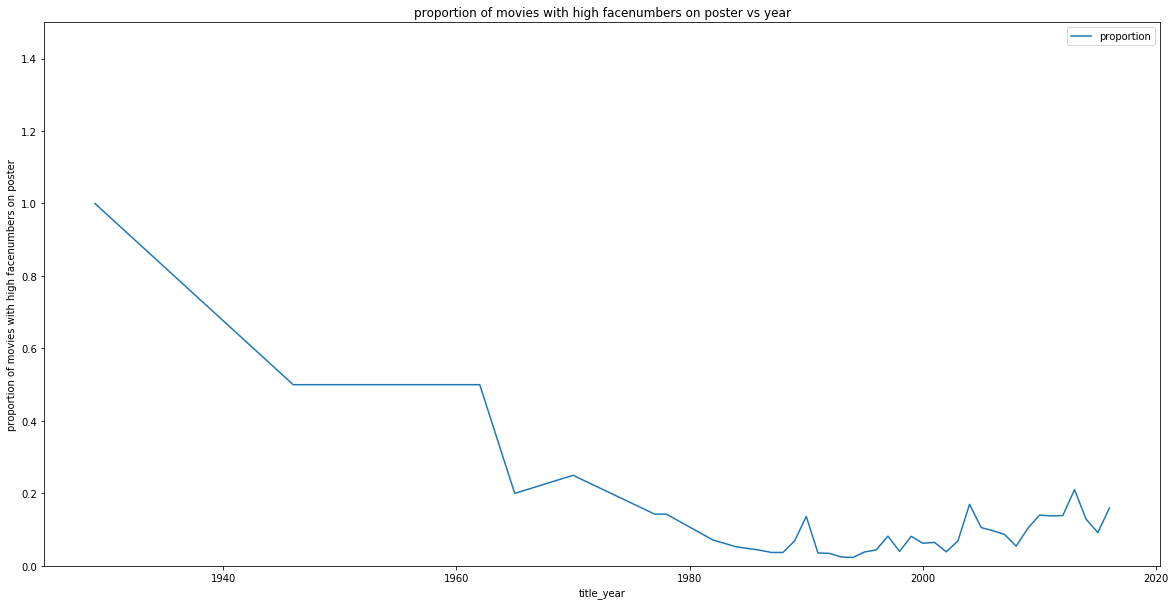

In [22]:
df_poster=df[['facenumber_in_poster','imdb_score','title_year']]
df_poster=df_poster.drop_duplicates()
# we choose a threshold of 4, beyond which we consider too many faces on poster
df_poster1=df_poster.groupby('title_year').size()
df_poster1=pd.DataFrame(df_poster1)
df_poster1['title_year']=df_poster1.index
df_poster_new=df_poster[df_poster['facenumber_in_poster']>4]
df_poster_grp=df_poster_new.groupby('title_year').size()
#print(df_poster_grp)
df_poster_grp=pd.DataFrame(df_poster_grp)
df_poster_grp['title_year']=df_poster_grp.index
new_df=pd.merge(df_poster1,df_poster_grp,on='title_year')
new_df['proportion']=new_df['0_y']/new_df['0_x']
new_df1=new_df[['proportion','title_year']]
ae=new_df1.plot(x='title_year',y='proportion',figsize=(20,10))
ae.set_ylabel('proportion of movies with high facenumbers on poster')
ae.set_ylim([0,1.5])
ae.set_title('proportion of movies with high facenumbers on poster vs year');

## 4.0  Conclusion

The chart shows that over the years proportion of released movies with larger star cast (>4) has decreased. If we see our previous correlations:
1) Average imdb_rating vs year trend (in general for movies)
2) Average imdb_rating vs year for low budget movies
We saw that these trends (1 and 2 ) have been decreasing. This can imply that number of movies with low budgets have been increasing in the current era. Small star cast can explain the low budget and hence the low ratings.

Future points to explore:
#### 1) Do certain actors help increase the IMDB rating
#### 2) Do certain directors help increase the star cast
#### 3) Is there a relation between facebook likes and imdb rating? which is more practical indicator? 
#### 4) Looking into more data such as Facebook likes for trailors of the movies, sentiment analysis from facebook comments 
#### 5) Are certain genres more popular then others?
#### 6) Is there a shift in liking of genre over years and producers should keep this into account before investing in next movie.